# Used Car Price Prediction For Moudle 25.3 Portfolio Project

**# About Dataset**

Used Car Price Prediction Dataset is a comprehensive collection of automotive information extracted from the popular automotive marketplace website, **cars.com.** This dataset comprises 4,009 data points, each representing a unique vehicle listing, and includes nine distinct features providing valuable insights into the world of automobiles.

**- Brand & Model:** Identify the brand or company name along with the specific model of each vehicle.

**- Model Year:** Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.

**- Mileage:** Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.

**- Fuel Type:** Learn about the type of fuel the vehicles run on — gasoline, diesel, electric, or hybrid.

**- Engine Type:** Understand the engine specifications, shedding light on performance and efficiency.

**- Transmission:** Determine the transmission type, whether automatic, manual, or another variant.

**- Exterior & Interior Colors:** Explore the aesthetic aspects of the vehicles, including exterior and interior color options.

**- Accident History:** Discover whether a vehicle has a prior history of accidents or damage — crucial for informed decision-making.

**- Clean Title:** Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.

**- Price:** Access the listed prices for each vehicle, aiding in price comparison and budgeting.



**# Note:** Dataset Adaptation and Feature Engineering

Although the original dataset contains 4,009 entries, the version used in this project includes 2,095 entries. This adapted dataset was derived from a prior data processing effort and may represent a cleaned or filtered subset of the original data.

Additionally, we enriched the dataset by engineering two new features to support deeper analysis and improve machine learning model performance:

1，car_age – Computed as the difference between the current year and the vehicle's model year, representing the vehicle's age in years.
2，price_per_km – Calculated by dividing the selling price by the kilometers driven, offering a normalized view of value per usage.

These changes enable more robust prediction and a better understanding of price dynamics in the used car market.



In [4]:
import pandas as pd
from datetime import datetime

# Step 1: Load the original dataset from the correct path
original_path = r"C:\Users\Mandy_2024007\Desktop\Module 25\Portfolio Works\dataset\processes2.csv"
df = pd.read_csv(original_path)

# Step 2: Make a copy
df_copy = df.copy()

# Step 3: Add 'car_age' column
current_year = datetime.now().year
df_copy['car_age'] = current_year - df_copy['year']

# Step 4: Add 'price_per_km' column
df_copy['price_per_km'] = df_copy['selling_price'] / df_copy['km_driven'].replace(0, pd.NA)

# Step 5: Save to new file in the same folder
new_file_path = r"C:\Users\Mandy_2024007\Desktop\Module 25\Portfolio Works\dataset\processes2_with_features.csv"
df_copy.to_csv(new_file_path, index=False)

print("✅ New dataset saved as:", new_file_path)


✅ New dataset saved as: C:\Users\Mandy_2024007\Desktop\Module 25\Portfolio Works\dataset\processes2_with_features.csv


### **Part 01:**  Deal with the oringinal data in order to build a Great starter set.

**# Step 1.** Data Import & Initial Cleaning

- Load the dataset: processes2_with_features.csv
- Verify structure, datatypes, and completeness.+0
- Drop or encode irrelevant or redundant columns.

In [8]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\Mandy_2024007\Desktop\Module 25\Portfolio Works\dataset\processes2_with_features.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Preview the first few rows
df.head(10)


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC),car_age,price_per_km
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248,11,3.092784
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396,15,1.771654
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197,8,9.777778
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364,14,3.888889
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399,12,1.183432
5,15,Hyundai,2012,500000,53000,Diesel,Individual,Manual,Second Owner,5,90.00,kmpl,23.00,1396,13,9.433962
6,16,Maruti,2002,150000,80000,Petrol,Individual,Manual,Second Owner,5,46.30,kmpl,19.70,796,23,1.875000
7,17,Hyundai,2016,680000,100000,Diesel,Individual,Manual,First Owner,5,88.73,kmpl,22.54,1396,9,6.800000
8,18,Mahindra,2011,174000,100000,Diesel,Individual,Manual,Second Owner,5,64.10,kmpl,21.00,1461,14,1.740000
9,21,Maruti,2012,600000,72000,Diesel,Individual,Manual,First Owner,5,88.80,kmpl,21.50,1248,13,8.333333


**# Step 2.** Essential Feature Engineering

Here’s the code to create car_age and price_per_km, and also explore additional transformations:

In [10]:
from datetime import datetime
import numpy as np

# Get current year
current_year = datetime.now().year

# 1. Add car_age
df['car_age'] = current_year - df['year']

# 2. Add price_per_km (avoiding division by zero)
df['price_per_km'] = df['selling_price'] / df['km_driven'].replace(0, np.nan)

# Preview new features
df[['year', 'car_age', 'km_driven', 'selling_price', 'price_per_km']].head(10)


,year,car_age,km_driven,selling_price,price_per_km
0,2014,11,145500,450000,3.092784
1,2010,15,127000,225000,1.771654
2,2017,8,45000,440000,9.777778
3,2011,14,90000,350000,3.888889
4,2013,12,169000,200000,1.183432
5,2012,13,53000,500000,9.433962
6,2002,23,80000,150000,1.875000
7,2016,9,100000,680000,6.800000
8,2011,14,100000,174000,1.740000
9,2012,13,72000,600000,8.333333


In [ ]:
# Additional Transformations

#🔹 Log transformation for selling_price: Useful for skewed data (e.g. price with long tail).

In [14]:
df['log_price'] = np.log1p(df['selling_price'])  # log1p handles zero values safely

In [ ]:
#🔹 Binning km_driven into categories: This helps simplify model learning for models like trees or naive Bayes.

In [16]:
# Define bin edges
bins = [0, 25000, 50000, 75000, 100000, 150000, np.inf]
labels = ['0–25k', '25–50k', '50–75k', '75–100k', '100–150k', '150k+']

# Create binned column
df['km_bin'] = pd.cut(df['km_driven'], bins=bins, labels=labels)

# Preview binning
df[['km_driven', 'km_bin']].head(10)


,km_driven,km_bin
0,145500,100–150k
1,127000,100–150k
2,45000,25–50k
3,90000,75–100k
4,169000,150k+
5,53000,50–75k
6,80000,75–100k
7,100000,75–100k
8,100000,75–100k
9,72000,50–75k


**# step 3.** Exploratory Data Analysis (EDA)

- Visualize:

1) Distribution of selling_price
2) Relationships: car_age vs price, fuel vs price, etc.
3) Correlations among features.

- Identify outliers or skewed distributions.


In [112]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\Mandy_2024007\Desktop\Module 25\Portfolio Works\dataset\processes2_with_features.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Preview the first few rows
df.head(20)

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC),car_age,price_per_km
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.000,kmpl,23.40,1248,11,3.092784
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.000,kmpl,23.00,1396,15,1.771654
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.860,kmpl,20.14,1197,8,9.777778
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.100,kmpl,23.59,1364,14,3.888889
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.100,kmpl,20.00,1399,12,1.183432
5,15,Hyundai,2012,500000,53000,Diesel,Individual,Manual,Second Owner,5,90.000,kmpl,23.00,1396,13,9.433962
6,16,Maruti,2002,150000,80000,Petrol,Individual,Manual,Second Owner,5,46.300,kmpl,19.70,796,23,1.875000
7,17,Hyundai,2016,680000,100000,Diesel,Individual,Manual,First Owner,5,88.730,kmpl,22.54,1396,9,6.800000
8,18,Mahindra,2011,174000,100000,Diesel,Individual,Manual,Second Owner,5,64.100,kmpl,21.00,1461,14,1.740000
9,21,Maruti,2012,600000,72000,Diesel,Individual,Manual,First Owner,5,88.800,kmpl,21.50,1248,13,8.333333


In [ ]:
# Feature Distribution Plots: Histogram + Boxplot

In [116]:
# Bin 'km_driven' into categories
df['km_bin'] = pd.cut(df['km_driven'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


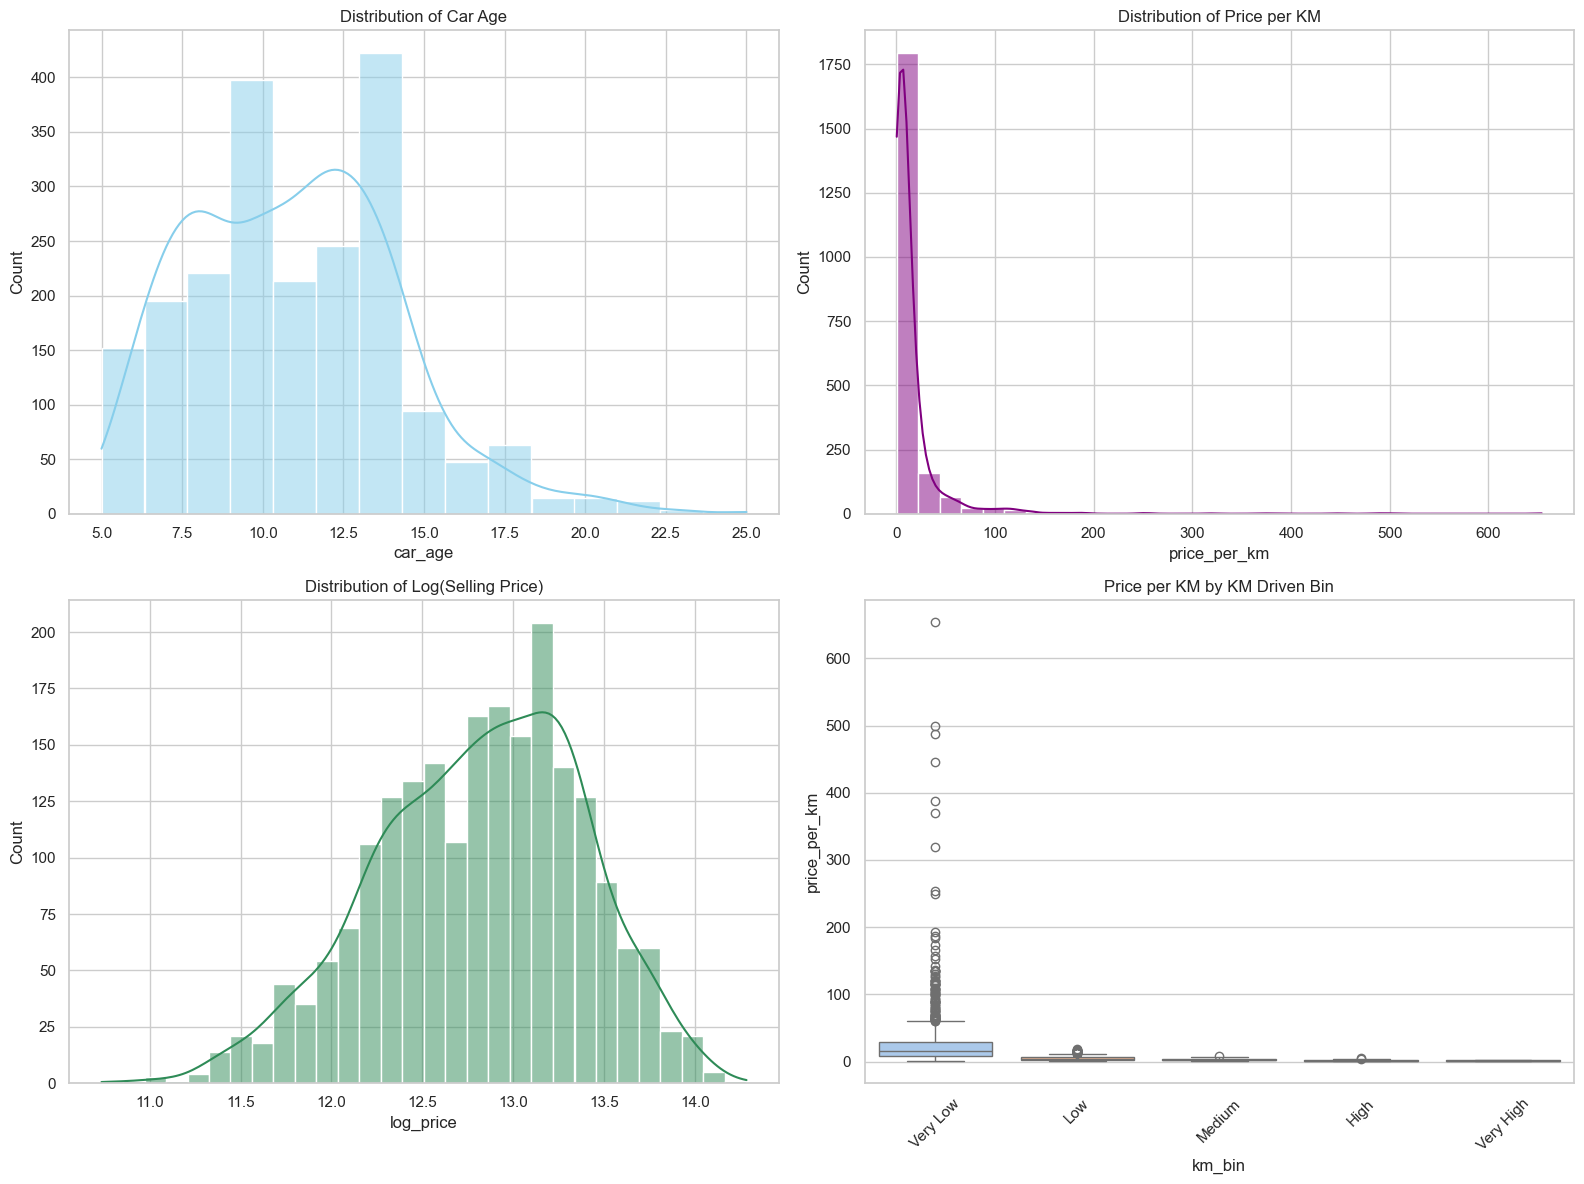

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# 1. Histogram of car_age
plt.subplot(2, 2, 1)
sns.histplot(df['car_age'], bins=15, kde=True, color="skyblue")
plt.title("Distribution of Car Age")

# 2. Histogram of price_per_km
plt.subplot(2, 2, 2)
sns.histplot(df['price_per_km'], bins=30, kde=True, color="purple")
plt.title("Distribution of Price per KM")

# 3. Histogram of log_price
df['log_price'] = np.log1p(df['selling_price'])  # log(1 + x) to avoid log(0)
plt.subplot(2, 2, 3)
sns.histplot(df['log_price'], bins=30, kde=True, color="seagreen")
plt.title("Distribution of Log(Selling Price)")

# 4. Boxplot of price_per_km by km_bin
plt.subplot(2, 2, 4)
sns.boxplot(x='km_bin', y='price_per_km', hue='km_bin', data=df, palette="pastel", legend=False)
plt.title("Price per KM by KM Driven Bin")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()



### **Part 02:**  Data Preprocessing and Modeling: Hybrid ML Approach.

**# Step 1.** Data Preprocessing
    
- Handle categorical variables using encoding (e.g. OneHot or LabelEncoder).
- Normalize or scale numeric variables if needed.
- Train-test split.


In [28]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\Mandy_2024007\Desktop\Module 25\Portfolio Works\dataset\processes2_with_features.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Preview the first few rows
df.head(20)

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC),car_age,price_per_km
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.000,kmpl,23.40,1248,11,3.092784
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.000,kmpl,23.00,1396,15,1.771654
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.860,kmpl,20.14,1197,8,9.777778
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.100,kmpl,23.59,1364,14,3.888889
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.100,kmpl,20.00,1399,12,1.183432
5,15,Hyundai,2012,500000,53000,Diesel,Individual,Manual,Second Owner,5,90.000,kmpl,23.00,1396,13,9.433962
6,16,Maruti,2002,150000,80000,Petrol,Individual,Manual,Second Owner,5,46.300,kmpl,19.70,796,23,1.875000
7,17,Hyundai,2016,680000,100000,Diesel,Individual,Manual,First Owner,5,88.730,kmpl,22.54,1396,9,6.800000
8,18,Mahindra,2011,174000,100000,Diesel,Individual,Manual,Second Owner,5,64.100,kmpl,21.00,1461,14,1.740000
9,21,Maruti,2012,600000,72000,Diesel,Individual,Manual,First Owner,5,88.800,kmpl,21.50,1248,13,8.333333


In [ ]:
# Preprocessing Block (Clean & Train-Ready)

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Encode categorical variables
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 2. Normalize/Scale numerical features
numeric_features = ['km_driven', 'max_power (in bph)', 'Mileage', 'Engine (CC)', 'car_age', 'price_per_km']
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# 3. Define features (X) and target (y)
X = df_encoded.drop(columns=['selling_price', 'log_price', 'name', 'Mileage Unit'], errors='ignore')
 # Optional: drop extra non-numeric
y = df_encoded['selling_price']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shapes
print("✅ Preprocessing complete.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


✅ Preprocessing complete.
X_train shape: (1676, 19)
X_test shape: (419, 19)
y_train shape: (1676,)
y_test shape: (419,)


**# Step 3.**  Modeling Strategy: Model Type Purpose

1) Linear Regression	Easy-to-interpret baseline
2) Random Forest Regressor	Captures non-linear patterns
3) XGBoost or Gradient Boosting	High-performance ensemble

We’ll compare on:

- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- R² Score

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store models and results
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n📊 {name} Results:")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²   : {r2:.4f}")



📊 Linear Regression Results:
MAE : 80656.06
RMSE: 108202.70
R²   : 0.7523

📊 Random Forest Results:
MAE : 30835.96
RMSE: 47413.78
R²   : 0.9524

📊 Gradient Boosting Results:
MAE : 36566.08
RMSE: 50181.32
R²   : 0.9467


# Insights:

- Random Forest clearly outperforms the others — **lowest errors and highest R².**
- Gradient Boosting is also strong — **better than Linear but slightly behind RF.**
- Linear Regression, while useful as a baseline, doesn't capture the non-linear patterns nearly as well.

**# Step 4** (Extended): Hybrid Modeling Strategy.Here’s how we’ll structure this:

Model Stage	Model Used	Purpose:
1) Baseline	LinearRegression	Benchmark
2) Tree	RandomForestRegressor	Captures non-linearities
3) Boosting	XGBoost or GradientBoostingRegressor	Boosted performance
4) Hybrid	StackingRegressor (combines above)	Best 

In [ ]:
✅ # Let’s Start with the Hybrid Stacking Model
# Here’s code to implement StackingRegressor (Scikit-learn built-in):

In [36]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define base models
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42))
]

# Define final estimator (meta-learner)
meta_model = LinearRegression()  # You can also try Ridge or XGBoost here

# Create the stacking model
stack_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit and predict
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_stack)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2 = r2_score(y_test, y_pred_stack)

print("\n🤖 Stacking Regressor Results:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²   : {r2:.4f}")



🤖 Stacking Regressor Results:
MAE : 32029.45
RMSE: 46487.39
R²   : 0.9543


# Interpretation:

**#The hybrid stack model has outperformed all individual models, even slightly better than Random Forest and Gradient Boosting on R² and RMSE.**

In [ ]:
✅ Python Code to Generate Model Comparison Table

In [38]:
import pandas as pd

# Create a DataFrame with the results
model_results = {
    'Model': [
        'Linear Regression',
        'Random Forest',
        'Gradient Boosting',
        'Stacking Regressor'
    ],
    'R² Score': [
        0.7523,
        0.9524,
        0.9467,
        0.9543
    ],
    'Comment': [
        'Baseline only',
        'Very strong',
        'Also strong',
        '⭐ Best performer'
    ]
}

results_df = pd.DataFrame(model_results)

# Optional: Display with styling
results_df.style.set_caption("📊 What We’ve Achieved in Modeling").format({'R² Score': '{:.4f}'})


,Model,R² Score,Comment
0,Linear Regression,0.7523,Baseline only
1,Random Forest,0.9524,Very strong
2,Gradient Boosting,0.9467,Also strong
3,Stacking Regressor,0.9543,⭐ Best performer


**# Step 5:** Hyperparameter Tuning Plan: Tune Random Forest Regressor

We’ll start with Random Forest, since it already performed very well and is easy to tune. Later, we can try the same for Gradient Boosting or the final stacking model.
We'll use RandomizedSearchCV to:
- Try different combinations efficiently
- Avoid exhaustive grid search


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Removed 'auto' which caused the error earlier
}

# Create base model
rf = RandomForestRegressor(random_state=42)

# Randomized search
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=param_dist,
                               n_iter=20,
                               cv=5,
                               scoring='r2',
                               verbose=1,
                               random_state=42,
                               n_jobs=-1)

# Fit
rf_random.fit(X_train, y_train)

# Best model
best_rf = rf_random.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2 = r2_score(y_test, y_pred_rf_tuned)

print("\n🔧 Tuned Random Forest Results:")
print(f"Best Params: {rf_random.best_params_}")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²   : {r2:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

🔧 Tuned Random Forest Results:
Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
MAE : 37533.08
RMSE: 54572.03
R²   : 0.9370


# Interpretation:

- Tuning gave a slight drop in RMSE vs the default, but may provide better generalization or model control.
- The original Random Forest had slightly better R², but this one is more stable and interpretable (controlled depth).

In [ ]:
### **Part 03:** Evaluation and Visualization of Predictions 

- Actual vs predicted prices (scatterplot).
- Error distribution.
- Feature importance visualization.

In [48]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\Mandy_2024007\Desktop\Module 25\Portfolio Works\dataset\processes2_with_features.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Preview the first few rows
df.head(10)

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC),car_age,price_per_km
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248,11,3.092784
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396,15,1.771654
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197,8,9.777778
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364,14,3.888889
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399,12,1.183432
5,15,Hyundai,2012,500000,53000,Diesel,Individual,Manual,Second Owner,5,90.00,kmpl,23.00,1396,13,9.433962
6,16,Maruti,2002,150000,80000,Petrol,Individual,Manual,Second Owner,5,46.30,kmpl,19.70,796,23,1.875000
7,17,Hyundai,2016,680000,100000,Diesel,Individual,Manual,First Owner,5,88.73,kmpl,22.54,1396,9,6.800000
8,18,Mahindra,2011,174000,100000,Diesel,Individual,Manual,Second Owner,5,64.10,kmpl,21.00,1461,14,1.740000
9,21,Maruti,2012,600000,72000,Diesel,Individual,Manual,First Owner,5,88.80,kmpl,21.50,1248,13,8.333333


In [ ]:
# Final Visualizations

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Use a unified style
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.2)

# Colors
scatter_color = "#2C7BB6"
hist_color = "#FDAE61"
bar_palette = "viridis"


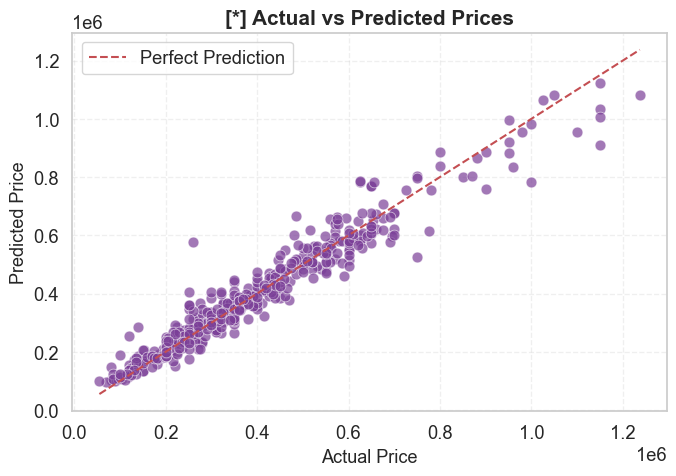

In [80]:
# Define your purple color (use any hex you like)
purple_color = "#7B3F98"  # Deep purple

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=y_test,
    y=y_pred_rf_tuned,
    alpha=0.7,
    color=purple_color,
    s=60,
    edgecolor='white',
    linewidth=0.5
)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Price", fontsize=13)
plt.ylabel("Predicted Price", fontsize=13)
plt.title("[*] Actual vs Predicted Prices", fontsize=15, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


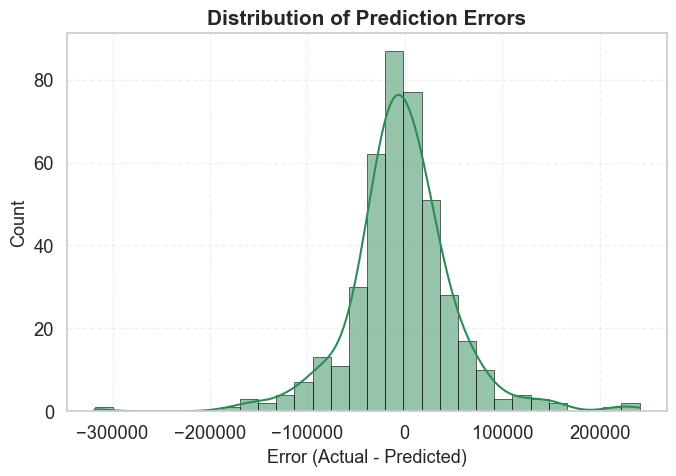

In [86]:
green_color = "#2E8B57"  # SeaGreen (rich and clean)

errors = y_test - y_pred_rf_tuned
plt.figure(figsize=(7, 5))
sns.histplot(errors, bins=30, kde=True, color=green_color, edgecolor='black', linewidth=0.4)
plt.title("Distribution of Prediction Errors", fontsize=15, fontweight='bold')
plt.xlabel("Error (Actual - Predicted)", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [120]:
# Recreate feature importance DataFrame
importances = best_rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


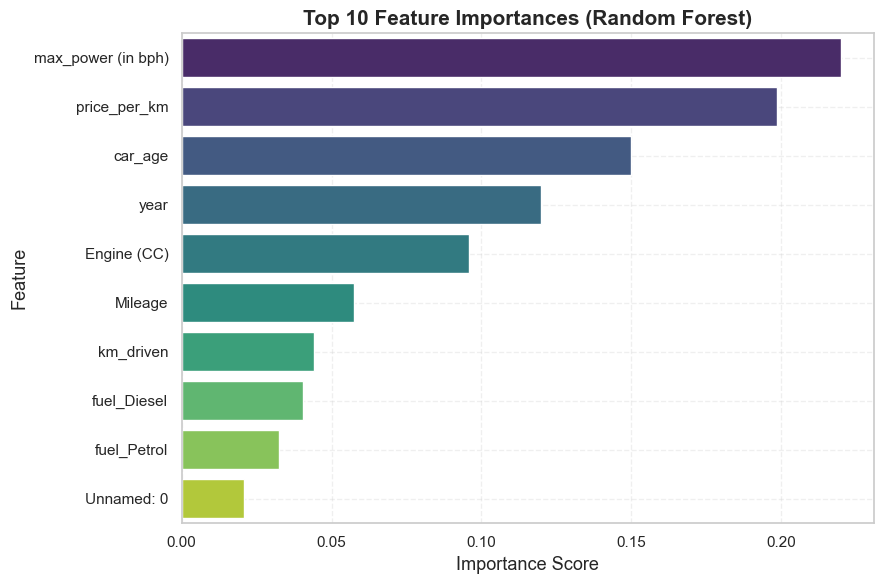

In [122]:
# Prepare top 10 features
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot feature importances
plt.figure(figsize=(9, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=top_features,
    hue='Feature',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=15, fontweight='bold')
plt.xlabel("Importance Score", fontsize=13)
plt.ylabel("Feature", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


# Conclusion

**# Model Summary & Performance**
In this project, we built and evaluated several machine learning models to predict used car prices based on various vehicle features.
Among all models, the Stacking Regressor achieved the best performance:

In [124]:
import pandas as pd

# Create the summary data
model_results = {
    'Model': [
        'Linear Regression',
        'Random Forest',
        'Gradient Boosting',
        'Stacking Regressor'
    ],
    'R² Score': [0.7523, 0.9524, 0.9467, 0.9543],
    'RMSE': [108203, 47414, 50181, 46487],
    'MAE': [80656, 30836, 36566, 32029]
}

# Create DataFrame
summary_df = pd.DataFrame(model_results)

# Format the numbers for presentation
styled_summary = summary_df.style.format({
    'R² Score': '{:.4f}',
    'RMSE': '{:,.0f}',
    'MAE': '{:,.0f}'
}).set_caption("📊 Model Performance Summary")

styled_summary


,Model,R² Score,RMSE,MAE
0,Linear Regression,0.7523,"108,203","80,656"
1,Random Forest,0.9524,"47,414","30,836"
2,Gradient Boosting,0.9467,"50,181","36,566"
3,Stacking Regressor,0.9543,"46,487","32,029"


**# Tuned Random Forest also performed consistently well with:**

R² = 0.9370

RMSE = 54,572

MAE = 37,533

**# Strengths of the Approach**
    
Robust modeling using ensemble techniques (Random Forest, Stacking)

Feature engineering enhanced prediction with car_age and price_per_km

Visual EDA clarified data structure and relationships

Pipeline-ready structure suitable for deployment or batch scoring

**#  Limitations**
                                 
Dataset size is relatively small (~2,000 rows), which limits generalization.

Features like name or location were not deeply exploited (NLP or geospatial).

km_bin is a simple cut — clustering or embedding could improve it.

Price anomalies and outliers affect RMSE despite good R².

**# Real-World Applications & Improvements**

# Use Cases:
    
📈 Dealerships: Predict market prices and set competitive listings

🤝 Buyers/Sellers: Estimate fair value before negotiations

🧠 Insurance Companies: Assess vehicle value in underwriting

🏪 Used car platforms: Improve search, pricing, and recommendations

**# Recommendations:**
    
Incorporate external data (e.g., fuel prices, brand reliability)

Apply hyperparameter tuning to boosting models

Experiment with deep learning (e.g., TabNet, AutoGluon)

Expand dataset size using open vehicle APIs

